https://towardsdatascience.com/naive-bayes-document-classification-in-python-e33ff50f937e

https://skipperkongen.dk/2018/09/19/cosine-similarity-in-python/

In [1]:
import pathlib
import sklearn
import numpy
import sys
import nltk
import spacy
import pandas as pd
import numpy as np
import itertools
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

In [2]:
sys.setrecursionlimit(10**6)

In [3]:
data = pd.read_csv("train-balanced-sarcasm.csv")

In [4]:
#cleaning out empty comments:
empty_comments = data["comment"].isna()
# empty_comments = test_data["comment"].isna()
empty_comments = data[empty_comments].index
# empty_comments = test_data[empty_comments].index
data.drop(empty_comments, axis=0, inplace=True)
# test_data.drop(empty_comments, axis=0, inplace=True)

In [5]:
#split data:
X_train, X_test, y_train, y_test = train_test_split(data["comment"], data["label"],test_size =0.3, random_state=50)
#split_data= train_test_split(data["comment"], data["label"],test_size =0.3, random_state=50)

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Unprocessed text

## **Bag of Words**
#### CountVectorizer: 
#### With test data vectorized

In [17]:
vectorizer = CountVectorizer(min_df=1, # in how many documents the term minimally occurs
                      tokenizer=nltk.word_tokenize) # we use the nltk tokenizer to split the text into tokens
X_train_cv = vectorizer.fit_transform(X_train)
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train_cv, y_train)

# naive_bayes = MultinomialNB()
X_test_cv = vectorizer.transform(X_test)
predictions = naive_bayes.predict(X_test_cv)

report = classification_report(y_test, predictions, digits = 3)
print(report)

              precision    recall  f1-score   support

           0      0.692     0.677     0.685    151624
           1      0.684     0.699     0.691    151608

    accuracy                          0.688    303232
   macro avg      0.688     0.688     0.688    303232
weighted avg      0.688     0.688     0.688    303232



###### The accuracy score: (true positives + true negatives) / total observations

###### The precision score: true positives / (true positives + false positives)

######  The recall score: true positives / (true positives + false negatives)

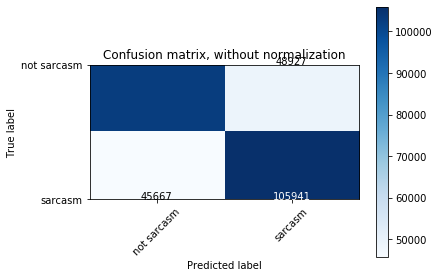

[[102697  48927]
 [ 45667 105941]]


In [8]:
CATEGORIES = ["not sarcasm","sarcasm"]
cm = confusion_matrix(y_test, predictions)
# sns.heatmap(cm, square=False, annot=True, cmap='RdBu', cbar=False, xticklabels=['not sarcasm', 'sarcasm'], yticklabels=['not sarcasm', 'sarcasm'])
# plt.xlabel('true label')
# plt.ylabel('predicted label')
plt.figure()
plot_confusion_matrix(cm, classes=CATEGORIES, title='Confusion matrix, without normalization')

#Als je hem wel genormaliseerd wil:
# plt.figure()
# plot_confusion_matrix(b_cm, classes=CATEGORIES, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()
print(cm)

## **TF-IFD**
#### TfidfTransformer:
#### With test data vectorized

In [24]:
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(X_train_cv)
naive_bayes2 = BernoulliNB()
naive_bayes2.fit(train_tfidf, y_train)

test_data_tfidf = tfidf_transformer.transform(X_test_cv) #wel nodig??
predicted2 = naive_bayes2.predict(test_data_tfidf)

report2 = classification_report(y_test, predicted2, digits = 3)
print(report2)

              precision    recall  f1-score   support

           0      0.692     0.677     0.685    151624
           1      0.684     0.699     0.691    151608

    accuracy                          0.688    303232
   macro avg      0.688     0.688     0.688    303232
weighted avg      0.688     0.688     0.688    303232



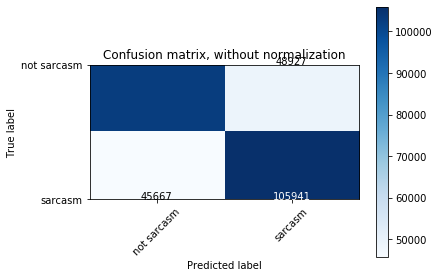

[[102697  48927]
 [ 45667 105941]]


In [25]:
CATEGORIES = ["not sarcasm","sarcasm"]
cm2 = confusion_matrix(y_test, predicted2)
# sns.heatmap(cm, square=False, annot=True, cmap='RdBu', cbar=False, xticklabels=['not sarcasm', 'sarcasm'], yticklabels=['not sarcasm', 'sarcasm'])
# plt.xlabel('true label')
# plt.ylabel('predicted label')
plt.figure()
plot_confusion_matrix(cm2, classes=CATEGORIES, title='Confusion matrix, without normalization')

#Als je hem wel genormaliseerd wil:
# plt.figure()
# plot_confusion_matrix(b_cm, classes=CATEGORIES, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()
print(cm2)

# Cosine Similarity

#### similarity between the vectorized training sets

In [62]:
#print(cv_array.shape)
#print(tfidf_array.shape)

cv_array = X_train_cv[0].toarray()
tfidf_array = train_tfidf[0].toarray()

cv_array = cv_array.flatten()
tfidf_array = tfidf_array.flatten()

# manually compute cosine similarity
dot = np.dot(cv_array, tfidf_array)
norm_BoW = np.linalg.norm(cv_array)
norm_tfidf = np.linalg.norm(tfidf_array)
cos = dot / (norm_BoW * norm_tfidf)
 
print('Dot product = %.3f, normalized BoW = %.3f, normalized tfidf = %.3f, cosine similarity = %.3f' %(dot,norm_BoW, norm_tfidf,cos))

Dot product = 2.294, normalized BoW = 2.449, normalized tfidf = 1.000, cosine similarity = 0.936


#### similarity between predictions of both vectorisation methods

In [63]:
#print(predictions.shape)
#print(predicted2.shape)

# manually compute cosine similarity
dot = np.dot(predictions, predicted2)
norm_BoW = np.linalg.norm(predictions)
norm_tfidf = np.linalg.norm(predicted2)
cos = dot / (norm_BoW * norm_tfidf)
 
print('Dot product = %.3f, normalized BoW = %.3f, normalized tfidf = %.3f, cosine similarity = %.3f' %(dot,norm_BoW, norm_tfidf,cos))

Dot product = 154868.000, normalized BoW = 393.533, normalized tfidf = 393.533, cosine similarity = 1.000


# Without stopwords

## **Bag of Words**
#### CountVectorizer: 
#### With test data vectorized

In [83]:
vectorizer2 = CountVectorizer(min_df=1, tokenizer=nltk.word_tokenize, stop_words=stopwords.words('english')) 
X_train_cv2 = vectorizer2.fit_transform(X_train)

naive_bayes3 = BernoulliNB()
naive_bayes3.fit(X_train_cv2, y_train)
# naive_bayes = MultinomialNB()

X_test_cv2 = vectorizer2.transform(X_test)
predictions3 = naive_bayes3.predict(X_test_cv2)

report3 = classification_report(predictions3, y_test, digits = 3)
print(report3)

C:\Users\Marin\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

           0      0.673     0.684     0.678    149085
           1      0.689     0.678     0.684    154147

    accuracy                          0.681    303232
   macro avg      0.681     0.681     0.681    303232
weighted avg      0.681     0.681     0.681    303232



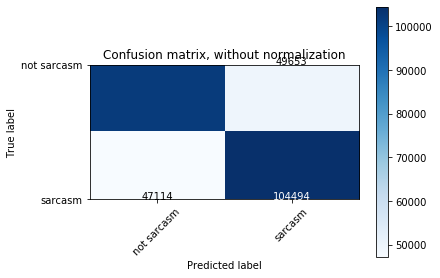

[[101971  49653]
 [ 47114 104494]]


In [84]:
CATEGORIES = ["not sarcasm","sarcasm"]
cm3 = confusion_matrix(y_test, predictions3)
# sns.heatmap(cm, square=False, annot=True, cmap='RdBu', cbar=False, xticklabels=['not sarcasm', 'sarcasm'], yticklabels=['not sarcasm', 'sarcasm'])
# plt.xlabel('true label')
# plt.ylabel('predicted label')
plt.figure()
plot_confusion_matrix(cm3, classes=CATEGORIES, title='Confusion matrix, without normalization')

#Als je hem wel genormaliseerd wil:
# plt.figure()
# plot_confusion_matrix(b_cm, classes=CATEGORIES, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()
print(cm3)

## **TF-IFD**
#### TfidfTransformer:
#### With test data vectorized

In [85]:
train_tfidf2 = tfidf_transformer.fit_transform(X_train_cv2)
naive_bayes2 = BernoulliNB()
naive_bayes2.fit(train_tfidf2, y_train)

test_data_tfidf2 = tfidf_transformer.transform(X_test_cv2) #wel nodig??
predicted4 = naive_bayes2.predict(test_data_tfidf2)

report4 = classification_report(y_test, predicted4, digits = 3)
print(report4)

              precision    recall  f1-score   support

           0      0.684     0.673     0.678    151624
           1      0.678     0.689     0.684    151608

    accuracy                          0.681    303232
   macro avg      0.681     0.681     0.681    303232
weighted avg      0.681     0.681     0.681    303232



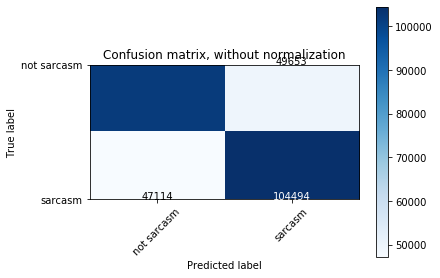

[[101971  49653]
 [ 47114 104494]]


In [86]:
CATEGORIES = ["not sarcasm","sarcasm"]
cm4 = confusion_matrix(y_test, predicted4)
# sns.heatmap(cm, square=False, annot=True, cmap='RdBu', cbar=False, xticklabels=['not sarcasm', 'sarcasm'], yticklabels=['not sarcasm', 'sarcasm'])
# plt.xlabel('true label')
# plt.ylabel('predicted label')
plt.figure()
plot_confusion_matrix(cm4, classes=CATEGORIES, title='Confusion matrix, without normalization')

#Als je hem wel genormaliseerd wil:
# plt.figure()
# plot_confusion_matrix(b_cm, classes=CATEGORIES, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()
print(cm4)

# Cosine Similarity
#### similarity between the vectorized training sets

In [87]:
#print(cv_array.shape)
#print(tfidf_array.shape)

cv_array2 = X_train_cv2[0].toarray()
tfidf_array2 = train_tfidf2[0].toarray()

cv_array2 = cv_array.flatten()
tfidf_array2 = tfidf_array.flatten()

# manually compute cosine similarity
dot = np.dot(cv_array2, tfidf_array2)
norm_BoW = np.linalg.norm(cv_array2)
norm_tfidf = np.linalg.norm(tfidf_array2)
cos = dot / (norm_BoW * norm_tfidf)
 
print('Dot product = %.3f, normalized BoW = %.3f, normalized tfidf = %.3f, cosine similarity = %.3f' %(dot,norm_BoW, norm_tfidf,cos))

Dot product = 2.294, normalized BoW = 2.449, normalized tfidf = 1.000, cosine similarity = 0.936


#### similarity between predictions of both vectorisation methods

In [88]:
#print(predictions.shape)
#print(predicted2.shape)

# manually compute cosine similarity
dot = np.dot(predictions3, predicted4)
norm_BoW = np.linalg.norm(predictions3)
norm_tfidf = np.linalg.norm(predicted4)
cos = dot / (norm_BoW * norm_tfidf)
 
print('Dot product = %.3f, normalized BoW = %.3f, normalized tfidf = %.3f, cosine similarity = %.3f' %(dot,norm_BoW, norm_tfidf,cos))

Dot product = 154147.000, normalized BoW = 392.616, normalized tfidf = 392.616, cosine similarity = 1.000
